In [101]:
import importlib
import mysklearn.mypytable
importlib.reload(mysklearn.mypytable)
from mysklearn.mypytable import MyPyTable

import utils
importlib.reload(utils)
import plot_utils
importlib.reload(plot_utils)


<module 'plot_utils' from '/home/finalProject/plot_utils.py'>

# Base Dataset

In [102]:
pre_diabetes_dataset = MyPyTable()
pre_diabetes_dataset.load_from_file("input_data/diabetes_prediction_dataset.csv")

diabetes_dataset = MyPyTable()
diabetes_dataset.load_from_file("output_data/cleaned_diabetes_data.csv")

diabetes_headers = diabetes_dataset.column_names
diabetes_data = diabetes_dataset.data

# Diabetes Processed Data
* removed all rows with no data for smoking

In [103]:
print("Pre processed dataset: rows and columns", pre_diabetes_dataset.get_shape())
print("Post processed dataset: rows and columns", diabetes_dataset.get_shape())

Pre processed dataset: rows and columns (100000, 9)
Post processed dataset: rows and columns (64184, 9)


# Dataset Diabetes Distribution

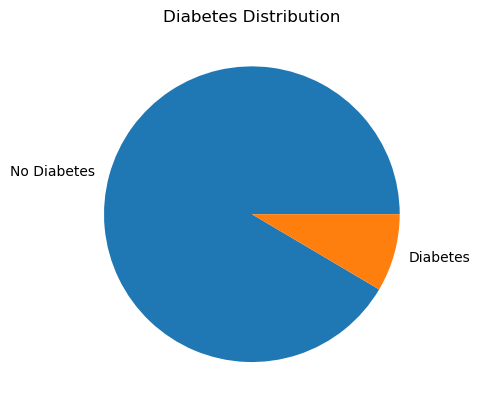

In [104]:
plot_utils.plot_diabetes_status()

# Gender Distribution

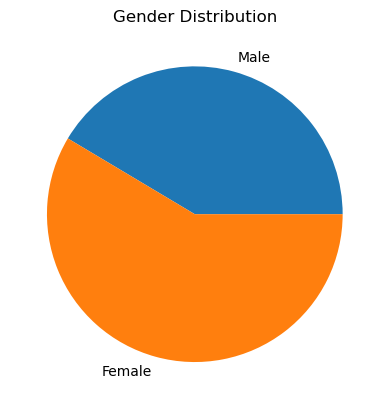

In [105]:
plot_utils.plot_gender_distribution()

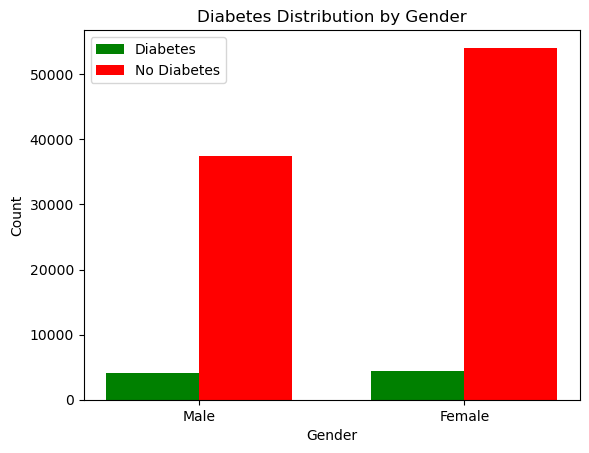

In [106]:
plot_utils.plot_diabetes_by_gender()

# Age Distribution

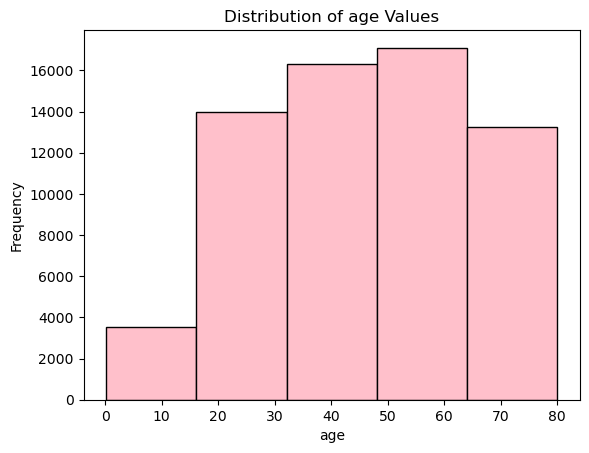

In [107]:
plot_utils.basic_histogram(diabetes_data, diabetes_headers, "age", 5)

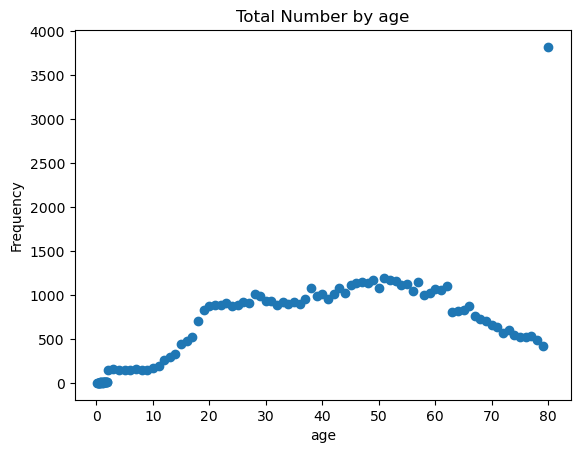

In [108]:
plot_utils.frequencies_scatter(diabetes_data, diabetes_headers, "age")

# Blood Glucose Level Distribution

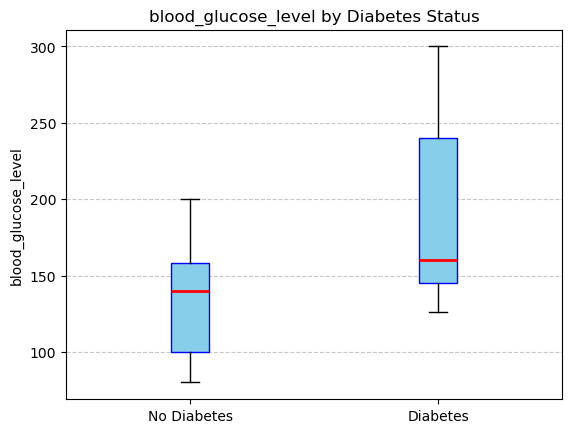

In [109]:
plot_utils.continuous_box_plt(diabetes_data, diabetes_headers, "blood_glucose_level")

# Heart Disease

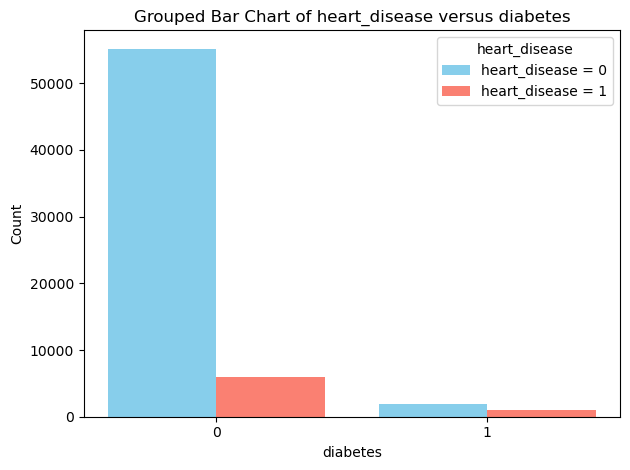

In [110]:
plot_utils.grouped_bar_chart(diabetes_data, diabetes_headers, "heart_disease")

# BMI

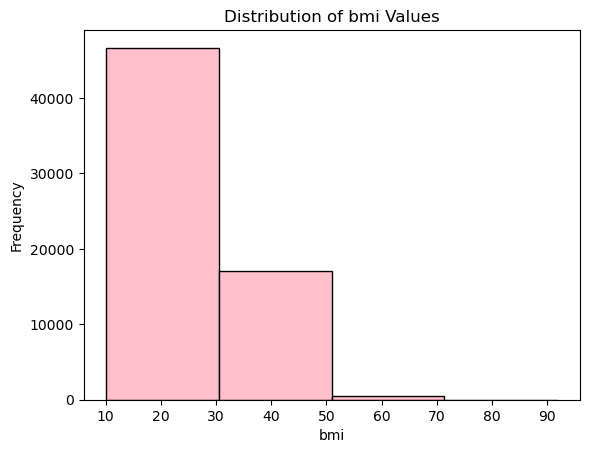

In [111]:
plot_utils.basic_histogram(diabetes_data, diabetes_headers, "bmi", 4)

Issue encountered: bmi resulted in several outliers when sorted by diabetes classificiation

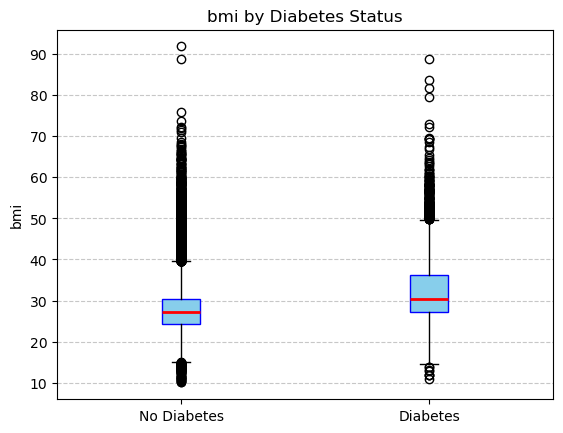

In [112]:
plot_utils.continuous_box_plt(diabetes_data, diabetes_headers, "bmi")

# HbA1c Level

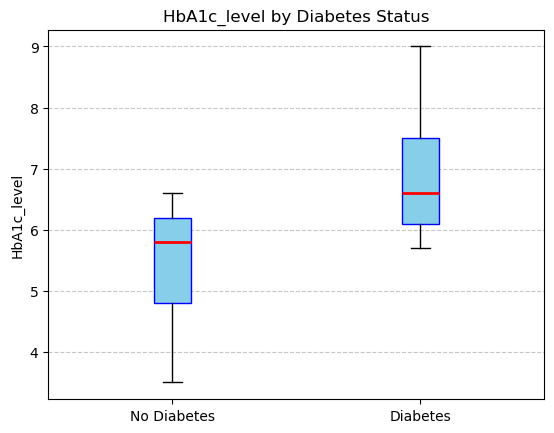

In [113]:
plot_utils.continuous_box_plt(diabetes_data, diabetes_headers, "HbA1c_level")

# Smoking History

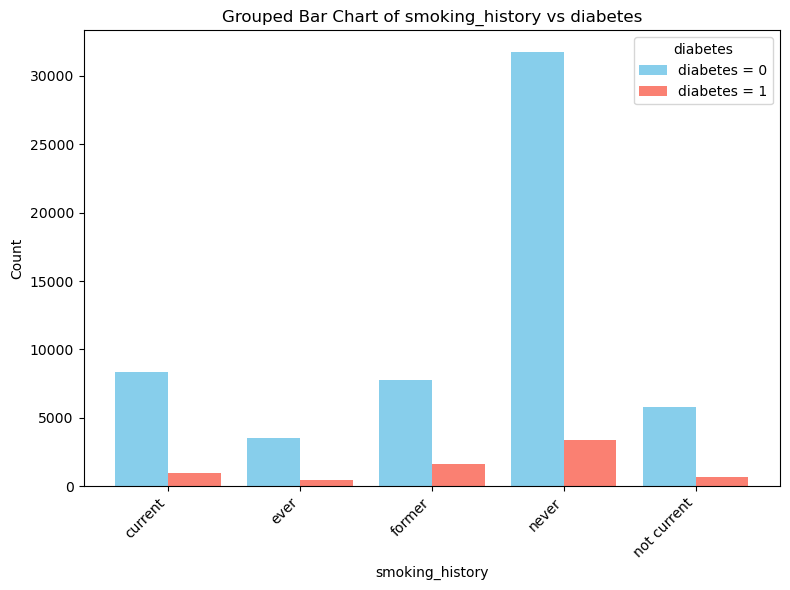

In [114]:
plot_utils.categorical_vs_binary_plt(diabetes_data, diabetes_headers, "smoking_history", "diabetes")

# Computing Summary Statistics
Maybe separate the dataset for diabetes = 0 and = 1? 

In [115]:
print("Overall dataset statistics")
print("------------------------------")

column_names = ["age", "hypertension", "heart_disease", "bmi", "HbA1c_level", "blood_glucose_level"]
summary_stats = diabetes_dataset.compute_summary_statistics(column_names)
summary_stats.pretty_print()

Overall dataset statistics
------------------------------
attribute              min     max     mid          avg    median
-------------------  -----  ------  ------  -----------  --------
age                   0.16   80      40.08   46.5441        47
hypertension          0       1       0.5     0.0978904      0
heart_disease         0       1       0.5     0.0470366      0
bmi                  10.08   91.82   50.95   28.4241        27.32
HbA1c_level           3.5     9       6.25    5.56428        5.8
blood_glucose_level  80     300     190     139.628        140


In [116]:
print("Diabetes instances statistics")
print("------------------------------")

diabetes_dataset.save_to_file_condition("output_data/positive_diabetes.csv", "diabetes", 1)
positive_diabetes = MyPyTable()
positive_diabetes.load_from_file("output_data/positive_diabetes.csv")

pos_stats = positive_diabetes.compute_summary_statistics(column_names)
pos_stats.pretty_print()

Diabetes instances statistics
------------------------------
attribute               min     max     mid         avg    median
-------------------  ------  ------  ------  ----------  --------
age                    4      80      42      61.06        62
hypertension           0       1       0.5     0.260573     0
heart_disease          0       1       0.5     0.149305     0
bmi                   10.98   88.72   49.85   32.217       30.475
HbA1c_level            5.7     9       7.35    6.93337      6.6
blood_glucose_level  126     300     213     193.622      160


In [117]:
print("Non-Diabetes instances statisitcs")
print("------------------------------")

diabetes_dataset.save_to_file_condition("output_data/negative_diabetes.csv", "diabetes", 0)
negative_diabetes = MyPyTable()
negative_diabetes.load_from_file("output_data/negative_diabetes.csv")

neg_stats = negative_diabetes.compute_summary_statistics(column_names)
neg_stats.pretty_print()

Non-Diabetes instances statisitcs
attribute              min     max     mid          avg    median
-------------------  -----  ------  ------  -----------  --------
age                   0.16   80      40.08   44.7541        45
hypertension          0       1       0.5     0.0778291      0
heart_disease         0       1       0.5     0.0344254      0
bmi                  10.08   91.82   50.95   27.9564        27.32
HbA1c_level           3.5     6.6     5.05    5.39545        5.8
blood_glucose_level  80     200     140     132.97         140
